# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.091857e+01     8.103963e+00
 * time: 0.0033109188079833984
     1     2.742889e+01     4.067061e+00
 * time: 0.015048980712890625
     2     1.800910e+01     3.171488e+00
 * time: 0.029449939727783203
     3     1.193431e+01     1.782895e+00
 * time: 0.0437169075012207
     4     1.080667e+01     1.545480e+00
 * time: 0.05525088310241699
     5     1.005558e+01     1.167307e+00
 * time: 0.06702804565429688
     6     9.640929e+00     9.331472e-01
 * time: 0.07897400856018066
     7     9.333901e+00     8.496141e-01
 * time: 0.09082698822021484
     8     8.954561e+00     6.646142e-01
 * time: 0.1026010513305664
     9     8.643727e+00     6.220678e-01
 * time: 0.11439394950866699
    10     8.427516e+00     5.091111e-01
 * time: 0.12613892555236816
    11     8.262925e+00     4.853953e-01
 * time: 0.13822197914123535
    12     8.181198e+00     6.163880e-01
 * time: 0.14725804328918457
    13     8.127012e+00     5.960968e-01
 * tim

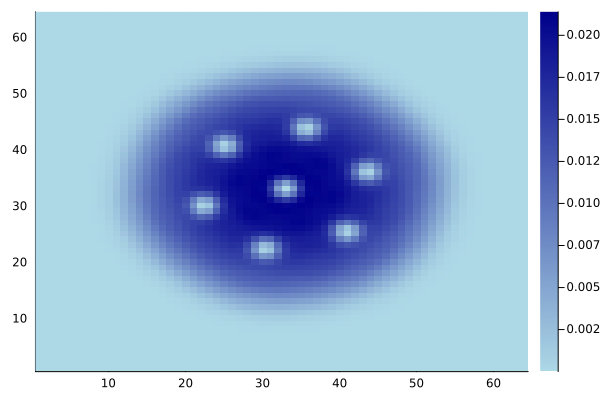

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)